## Compare Grit to perturbseq Relative Activity Score

The perturbseq data come from the CRISPRi experiment from:

> Jost, M., Santos, D.A., Saunders, R.A. et al. Titrating gene expression using libraries of systematically attenuated CRISPR guide RNAs. Nat Biotechnol 38, 355–364 (2020). https://doi.org/10.1038/s41587-019-0387-5

and relative activity is defined as:

The fold-knockdown of each mismatched variant divided by the fold-knockdown of the perfectly-matched sgRNA.

### Also, visualize singlecell-grit

In [1]:
import pathlib
import numpy as np
import pandas as pd
import plotnine as gg

In [2]:
# Load perturbseq results
perturbseq_results_dir = pathlib.Path("../../1.calculate-metrics/perturb-seq/results")

gse_id = "GSE132080"
results_file = pathlib.Path(f"{perturbseq_results_dir}/{gse_id}_grit.tsv")

output_dir = "figures"

bulk_grit_df = pd.read_csv(results_file, sep="\t")

bulk_grit_df.loc[:, "gene"] = pd.Categorical(
    bulk_grit_df.gene, categories=bulk_grit_df.gene.unique()
)

print(bulk_grit_df.shape)
bulk_grit_df.head(2)

(128, 10)


perturbation  group       grit  \
0  HSPA5_HSPA5_+_128003624.23-P1P2_01  HSPA5  27.978637   
1   GATA1_GATA1_-_48645022.23-P1P2_00  GATA1  27.381778   

                             id              sequence   gene  gamma_day5  \
0  HSPA5_+_128003624.23-P1P2_01  GAACCGAGTAGGCGACGGTG  HSPA5   -0.637327   
1   GATA1_-_48645022.23-P1P2_00  GTGAGCTTGCCACATCCCCA  GATA1   -0.962732   

   gamma_day10  relative_activity_day5  relative_activity_day10  
0    -0.374808                0.852461                 0.877397  
1    -0.615306                1.000000                 1.000000

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 4 x 3.5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/GSE132080_crispri_grit_relative_activity_comparison.png


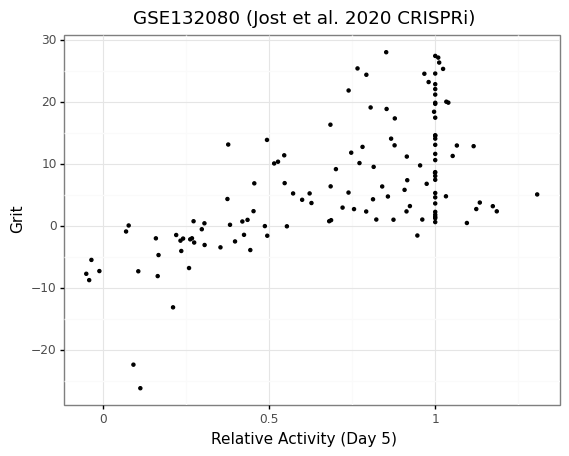

<ggplot: (397001897)>

In [3]:
# Global view
global_gg = (
    gg.ggplot(bulk_grit_df, gg.aes(x="relative_activity_day5", y="grit")) +
    gg.geom_point(size=0.8) +
    gg.theme_bw() +
    gg.xlab("Relative Activity (Day 5)") +
    gg.ylab("Grit") +
    gg.ggtitle(f"{gse_id} (Jost et al. 2020 CRISPRi)")
)

output_file = pathlib.Path(f"{output_dir}/{gse_id}_crispri_grit_relative_activity_comparison.png")
global_gg.save(output_file, dpi=500, height=3.5, width=4)

global_gg

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/GSE132080_crispri_grit_relative_activity_comparison.png


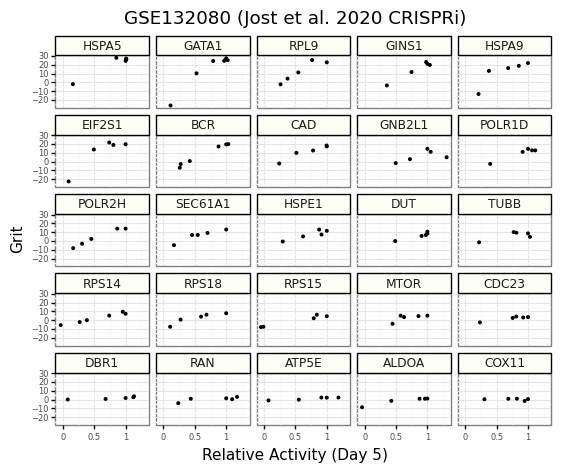

<ggplot: (399840931)>

In [4]:
gene_gg = (
    gg.ggplot(bulk_grit_df, gg.aes(x="relative_activity_day5", y="grit")) +
    gg.geom_point(size=0.6) +
    gg.theme_bw() +
    gg.xlab("Relative Activity (Day 5)") +
    gg.ylab("Grit") +
    gg.ggtitle(f"{gse_id} (Jost et al. 2020 CRISPRi)") +
    gg.facet_wrap("~gene") +
    gg.theme(
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
        axis_text=gg.element_text(size=6)
    )
)

output_file = pathlib.Path(f"{output_dir}/{gse_id}_crispri_grit_relative_activity_comparison.png")
gene_gg.save(output_file, dpi=500, height=5, width=6)

gene_gg

## Visualize single cell grit

In [5]:
# Load perturbseq gene expression data
perturbseq_data_dir = pathlib.Path("../../0.download-data/data/perturbseq/")

gene_exp_file = pathlib.Path(f"{perturbseq_data_dir}/{gse_id}_final_analytical.tsv.gz")

sc_gene_exp_df = pd.read_csv(gene_exp_file, sep="\t")

print(sc_gene_exp_df.shape)
sc_gene_exp_df.head()

(23537, 1012)


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.


Metadata_cell_identity Metadata_cell_barcode  \
0           sc_profile_0    AAACCTGAGAGTAATC-1   
1           sc_profile_1    AAACCTGAGGGATCTG-1   
2           sc_profile_2    AAACCTGAGGTCATCT-1   
3           sc_profile_3    AAACCTGCAATGGAGC-1   
4           sc_profile_4    AAACCTGCACCAGGCT-1   

                Metadata_guide_identity  Metadata_read_count  \
0        RAN_RAN_+_131356438.23-P1P2_12                544.0   
1          neg_ctrl_non-targeting_00089                267.0   
2  POLR2H_POLR2H_+_184081251.23-P1P2_08                622.0   
3         TUBB_TUBB_+_30688126.23-P1_03                433.0   
4    CDC23_CDC23_-_137548987.23-P1P2_04                136.0   

   Metadata_UMI_count  Metadata_coverage  Metadata_gemgroup  \
0                34.0          16.000000                1.0   
1                19.0          14.052632                1.0   
2                34.0          18.294118                1.0   
3                20.0          21.650000                1.0   
4                 8.0          17.000000                1.0   

  Metadata_good_coverage  Metadata_number_of_cells Metadata_gene_identity  \
0                   True                       1.0                    RAN   
1                   True                       1.0                    neg   
2                   True                       1.0                 POLR2H   
3                   True                       1.0                   TUBB   
4                   True                       1.0                  CDC23   

   ...    YPEL4     YPEL5    ZBTB38     ZFAS1   ZFP36L1    ZNF365     ZNF43  \
0  ... -0.09309 -0.632468 -0.539091 -1.633805 -0.876912 -0.012155 -0.017763   
1  ... -0.09309 -0.632468 -0.539091  1.610220  1.322265 -0.012155 -0.017763   
2  ... -0.09309 -0.632468 -0.539091 -0.567252  0.057540 -0.012155 -0.017763   
3  ... -0.09309  1.765279 -0.539091 -1.659420 -0.876912 -0.012155 -0.017763   
4  ... -0.09309  0.686753 -0.539091  0.541260  0.934539 -0.012155 -0.017763   

     ZNF483  ZNF556       ZYX  
0 -0.026877 -0.0524 -0.452229  
1 -0.026877 -0.0524 -0.452229  
2 -0.026877 -0.0524 -0.452229  
3 -0.026877 -0.0524 -0.452229  
4 -0.026877 -0.0524  1.406718  

[5 rows x 1012 columns]

In [6]:
# Load single cell grit results
sc_results_file = pathlib.Path(f"{perturbseq_results_dir}/{gse_id}_single_cell_grit.tsv.gz")
sc_df = pd.read_csv(sc_results_file, sep="\t")

# Load UMAP embeddings
sc_embeddings_file = pathlib.Path(f"{perturbseq_results_dir}/{gse_id}_single_cell_umap_embeddings.tsv.gz")
sc_embeddings_df = pd.read_csv(sc_embeddings_file, sep="\t")

sc_df = sc_embeddings_df.merge(
    sc_df,
    left_on=["Metadata_cell_identity", "grit_gene"],
    right_on=["perturbation", "grit_gene"],
    how="right"
).merge(
    bulk_grit_df,
    left_on=["Metadata_guide_identity", "Metadata_gene_identity"],
    right_on=["perturbation", "gene"],
    how="outer",
    suffixes=["", "_bulk_activity"]
)


sc_df.loc[:, "gene"] = pd.Categorical(
    sc_df.gene, categories=bulk_grit_df.gene.unique()
)

sc_df.loc[:, "Metadata_gene_identity"] = pd.Categorical(
    sc_df.Metadata_gene_identity, categories=["neg"] + bulk_grit_df.gene.unique().tolist()
)

print(sc_df.shape)
sc_df.head()

(83105, 29)


Metadata_cell_identity Metadata_cell_barcode  \
0           sc_profile_0    AAACCTGAGAGTAATC-1   
1       sc_profile_10030    ATTCTACCATGCAACT-2   
2       sc_profile_10094    ATTTCTGCAGGTCGTC-2   
3       sc_profile_10164    CAAGATCAGGTTACCT-2   
4       sc_profile_10280    CACAGGCCAAGGTGTG-2   

          Metadata_guide_identity  Metadata_read_count  Metadata_UMI_count  \
0  RAN_RAN_+_131356438.23-P1P2_12                544.0                34.0   
1  RAN_RAN_+_131356438.23-P1P2_12                643.0                22.0   
2  RAN_RAN_+_131356438.23-P1P2_12                694.0                37.0   
3  RAN_RAN_+_131356438.23-P1P2_12                317.0                12.0   
4  RAN_RAN_+_131356438.23-P1P2_12                818.0                29.0   

   Metadata_coverage  Metadata_gemgroup  Metadata_good_coverage  \
0          16.000000                1.0                    True   
1          29.227273                2.0                    True   
2          18.756757                2.0                    True   
3          26.416667                2.0                    True   
4          28.206897                2.0                    True   

   Metadata_number_of_cells Metadata_gene_identity  ...  \
0                       1.0                    RAN  ...   
1                       1.0                    RAN  ...   
2                       1.0                    RAN  ...   
3                       2.0                    RAN  ...   
4                       1.0                    RAN  ...   

       perturbation_bulk_activity group_bulk_activity  grit_bulk_activity  \
0  RAN_RAN_+_131356438.23-P1P2_12                 RAN            -4.07571   
1  RAN_RAN_+_131356438.23-P1P2_12                 RAN            -4.07571   
2  RAN_RAN_+_131356438.23-P1P2_12                 RAN            -4.07571   
3  RAN_RAN_+_131356438.23-P1P2_12                 RAN            -4.07571   
4  RAN_RAN_+_131356438.23-P1P2_12                 RAN            -4.07571   

                           id              sequence gene gamma_day5  \
0  RAN_+_131356438.23-P1P2_12  GGCGGTCGCTGCGCTTAGGT  RAN  -0.046549   
1  RAN_+_131356438.23-P1P2_12  GGCGGTCGCTGCGCTTAGGT  RAN  -0.046549   
2  RAN_+_131356438.23-P1P2_12  GGCGGTCGCTGCGCTTAGGT  RAN  -0.046549   
3  RAN_+_131356438.23-P1P2_12  GGCGGTCGCTGCGCTTAGGT  RAN  -0.046549   
4  RAN_+_131356438.23-P1P2_12  GGCGGTCGCTGCGCTTAGGT  RAN  -0.046549   

   gamma_day10 relative_activity_day5 relative_activity_day10  
0    -0.034259               0.235823                0.212155  
1    -0.034259               0.235823                0.212155  
2    -0.034259               0.235823                0.212155  
3    -0.034259               0.235823                0.212155  
4    -0.034259               0.235823                0.212155  

[5 rows x 29 columns]

In [7]:
sc_df.Metadata_gene_identity.value_counts()

neg        62336
POLR1D      1375
DUT         1243
DBR1        1107
GNB2L1      1006
HSPE1        977
MTOR         964
RPS14        960
COX11        932
GINS1        900
RAN          875
CAD          874
BCR          869
ATP5E        832
CDC23        829
SEC61A1      828
HSPA5        745
RPS15        693
TUBB         672
RPS18        628
ALDOA        625
EIF2S1       614
RPL9         608
GATA1        577
HSPA9        542
POLR2H       494
Name: Metadata_gene_identity, dtype: int64

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/GSE132080_singlecell_crispri_grit_relative_activity_comparison.png


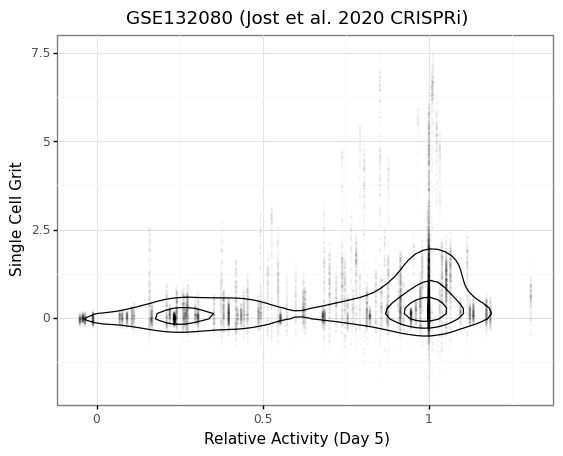

<ggplot: (399792122)>

In [8]:
global_gg = (
    gg.ggplot(sc_df.dropna(subset=["gene"]), gg.aes(x="relative_activity_day5", y="grit")) +
    gg.geom_density_2d() +
    gg.geom_point(size=0.2, alpha=0.01) +
    gg.theme_bw() +
    gg.xlab("Relative Activity (Day 5)") +
    gg.ylab("Single Cell Grit") +
    gg.ggtitle(f"{gse_id} (Jost et al. 2020 CRISPRi)")
)

output_file = pathlib.Path(f"{output_dir}/{gse_id}_singlecell_crispri_grit_relative_activity_comparison.png")
global_gg.save(output_file, dpi=500, height=5, width=6)

global_gg

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/GSE132080_singlecell_by_gene_crispri_grit_relative_activity_comparison.png


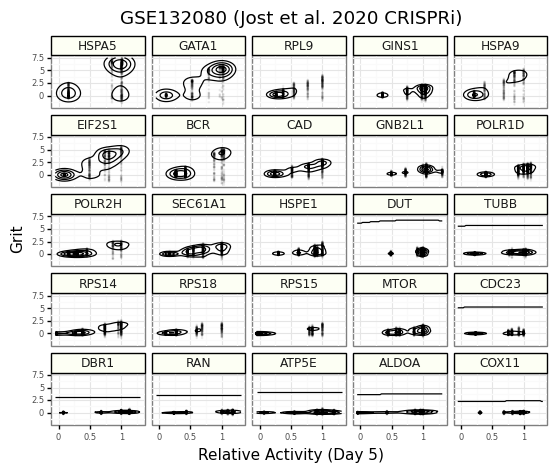

<ggplot: (400529207)>

In [9]:
gene_gg = (
    gg.ggplot(sc_df.dropna(subset=["gene"]), gg.aes(x="relative_activity_day5", y="grit")) +
    gg.geom_density_2d() +
    gg.geom_point(alpha=0.05, size=0.1) +
    gg.theme_bw() +
    gg.xlab("Relative Activity (Day 5)") +
    gg.ylab("Grit") +
    gg.ggtitle(f"{gse_id} (Jost et al. 2020 CRISPRi)") +
    gg.facet_wrap("~gene") +
    gg.theme(
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
        axis_text=gg.element_text(size=6)
    )
)

output_file = pathlib.Path(
    f"{output_dir}/{gse_id}_singlecell_by_gene_crispri_grit_relative_activity_comparison.png"
)
gene_gg.save(output_file, dpi=500, height=5, width=6)

gene_gg

## Plot individual UMAPs per gene

/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RAN_singlecell_umap_grit.png


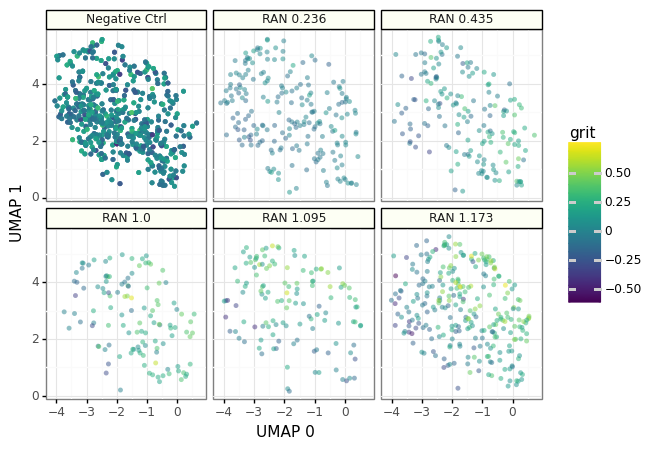

<ggplot: (397494748)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_POLR2H_singlecell_umap_grit.png


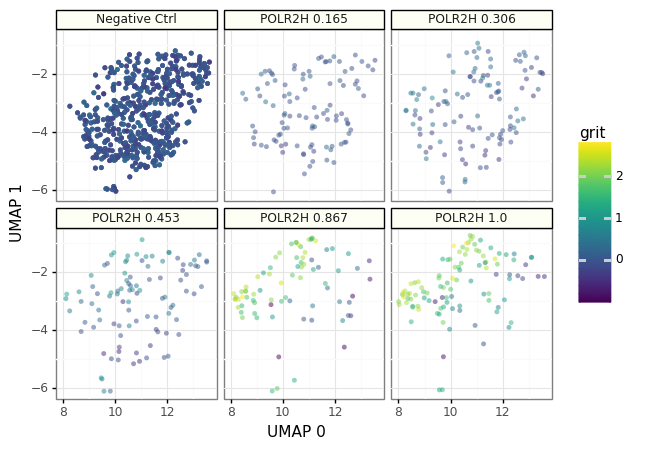

<ggplot: (399316276)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_TUBB_singlecell_umap_grit.png


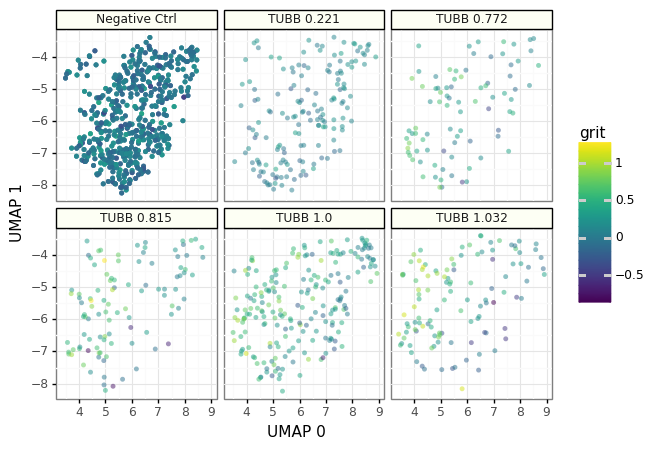

<ggplot: (399792086)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_TUBB_singlecell_umap_expression.png


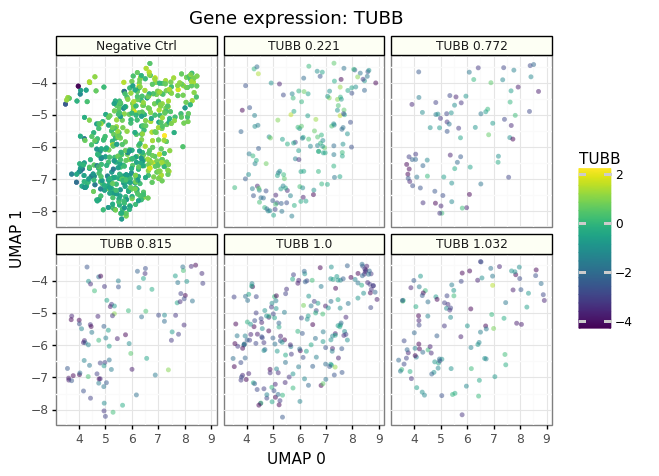

<ggplot: (397652791)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_CDC23_singlecell_umap_grit.png


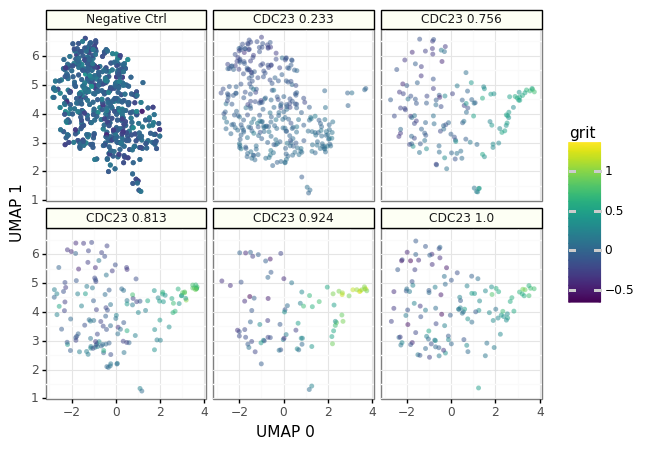

<ggplot: (400010665)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_POLR1D_singlecell_umap_grit.png


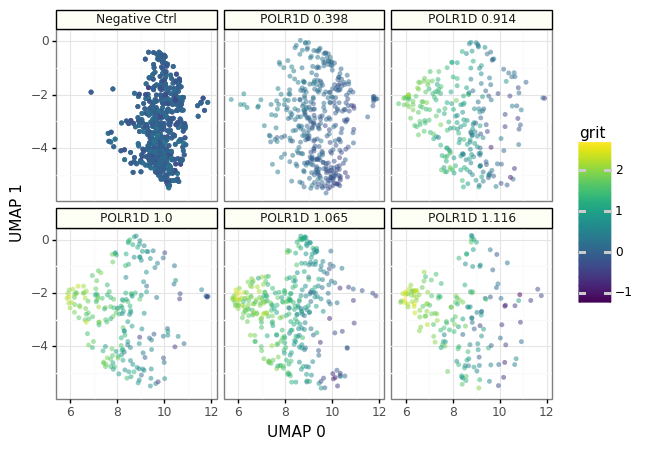

<ggplot: (397148489)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_DUT_singlecell_umap_grit.png


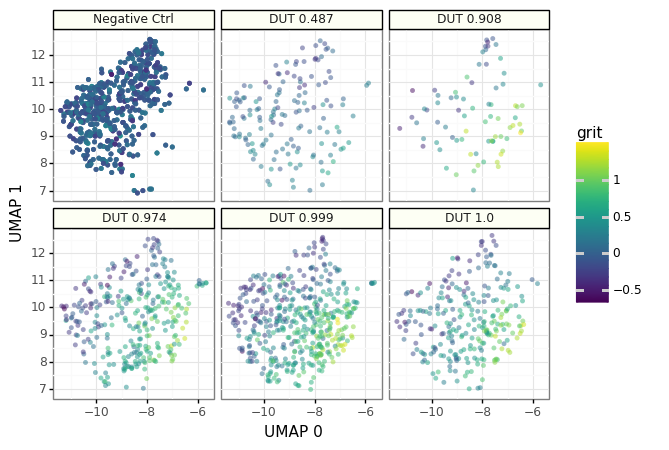

<ggplot: (400581500)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_DUT_singlecell_umap_expression.png


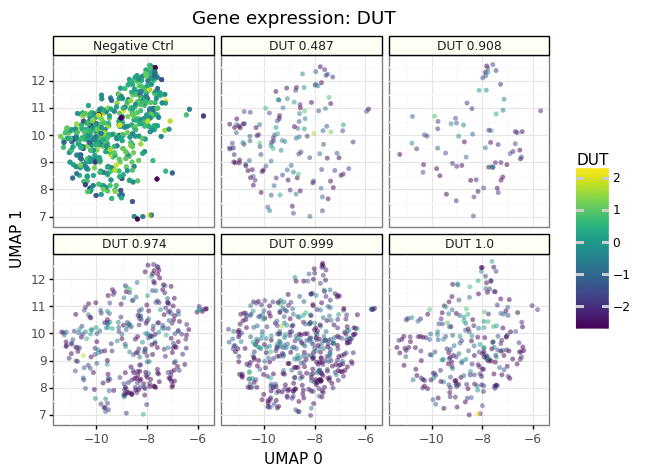

<ggplot: (397440621)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPA5_singlecell_umap_grit.png


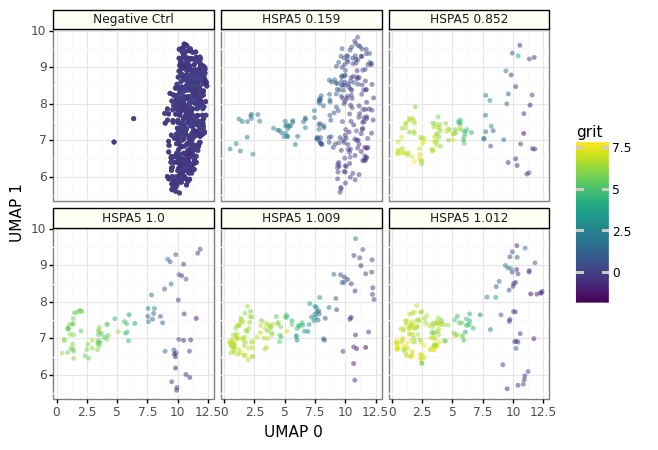

<ggplot: (397403941)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPA5_singlecell_umap_expression.png


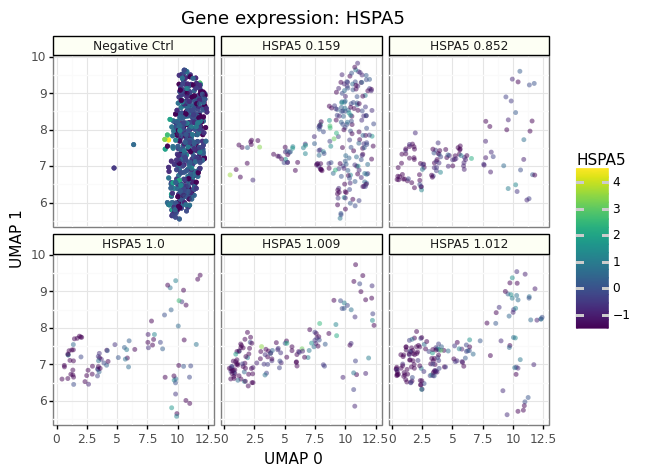

<ggplot: (401625513)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_MTOR_singlecell_umap_grit.png


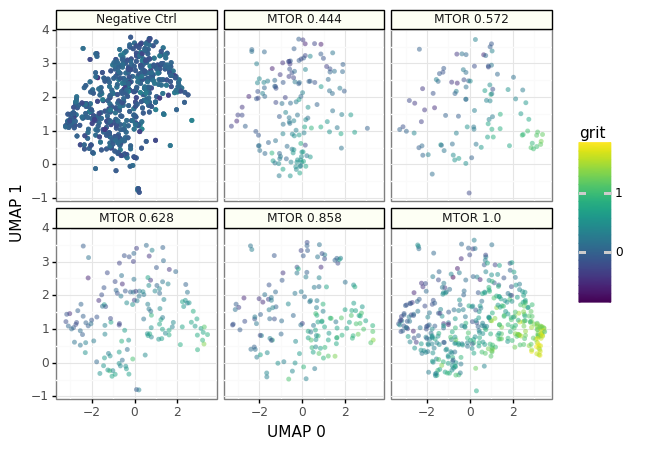

<ggplot: (397106469)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_GATA1_singlecell_umap_grit.png


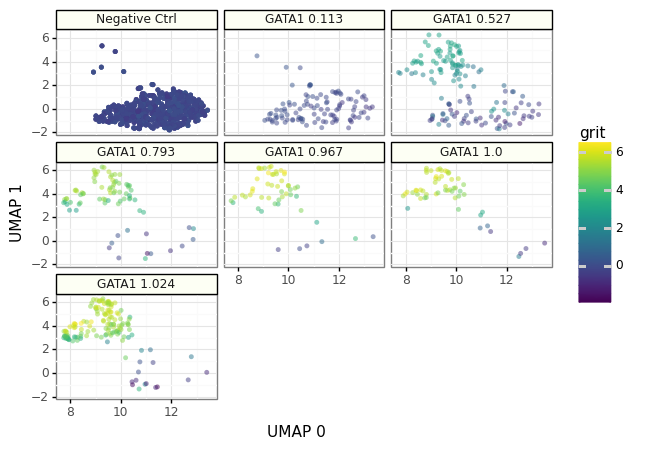

<ggplot: (397627426)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_GINS1_singlecell_umap_grit.png


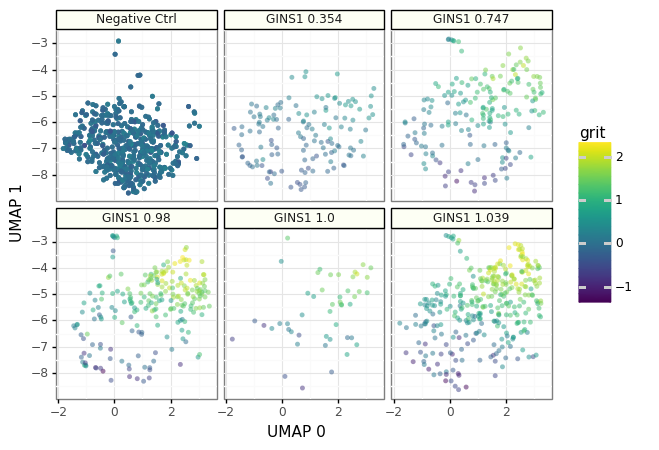

<ggplot: (397406290)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPE1_singlecell_umap_grit.png


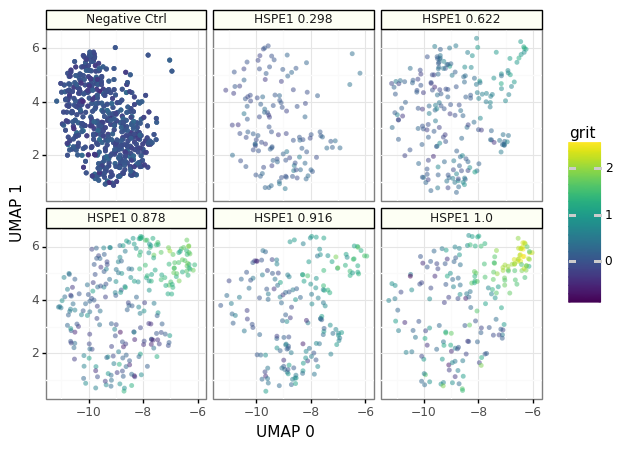

<ggplot: (397736452)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPE1_singlecell_umap_expression.png


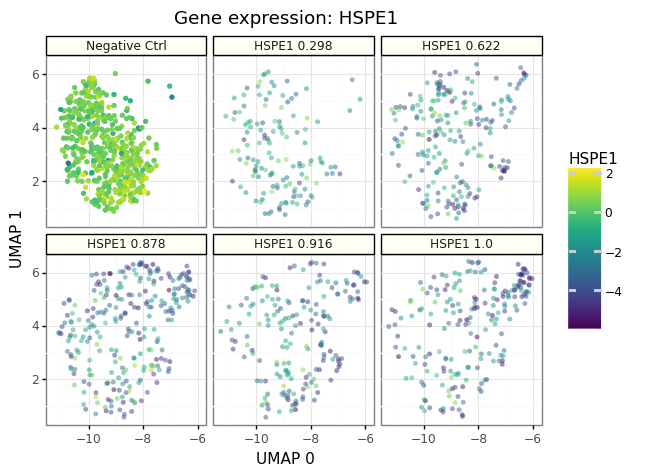

<ggplot: (397165219)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPS14_singlecell_umap_grit.png


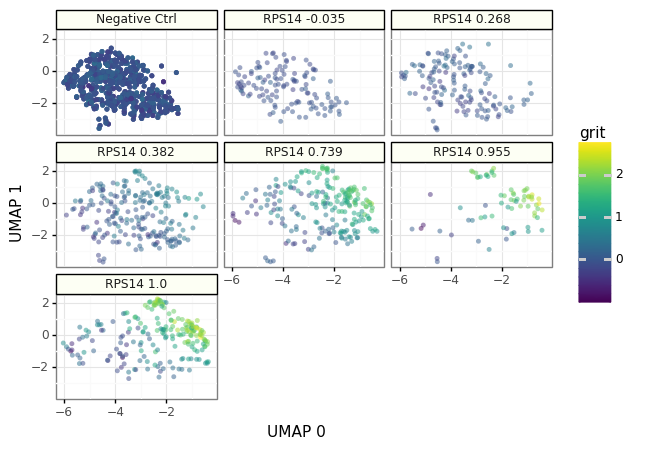

<ggplot: (404019911)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_EIF2S1_singlecell_umap_grit.png


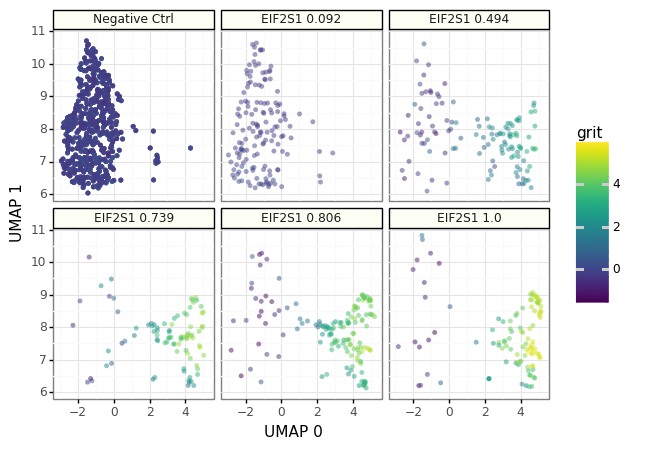

<ggplot: (397273866)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_DBR1_singlecell_umap_grit.png


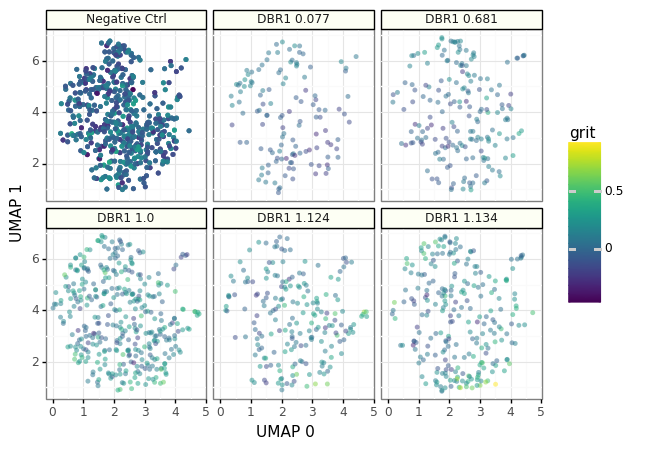

<ggplot: (401333408)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_CAD_singlecell_umap_grit.png


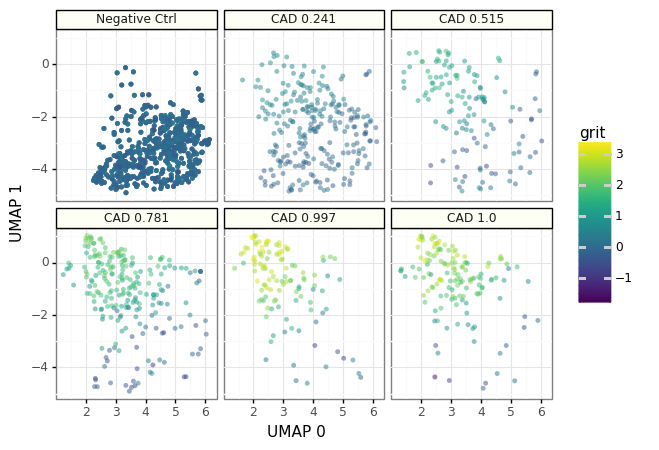

<ggplot: (397302251)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_SEC61A1_singlecell_umap_grit.png


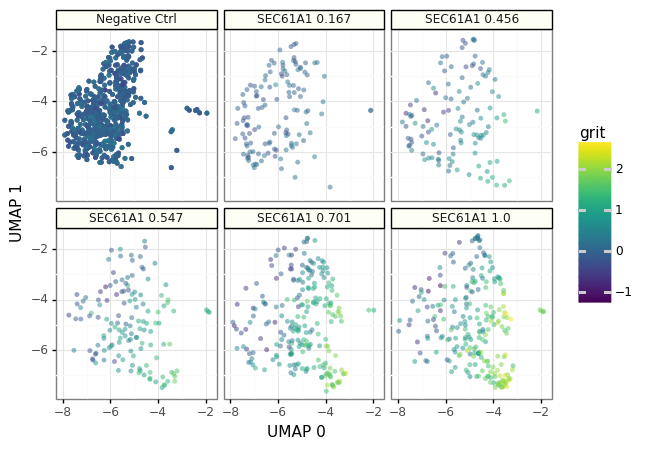

<ggplot: (397620658)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPL9_singlecell_umap_grit.png


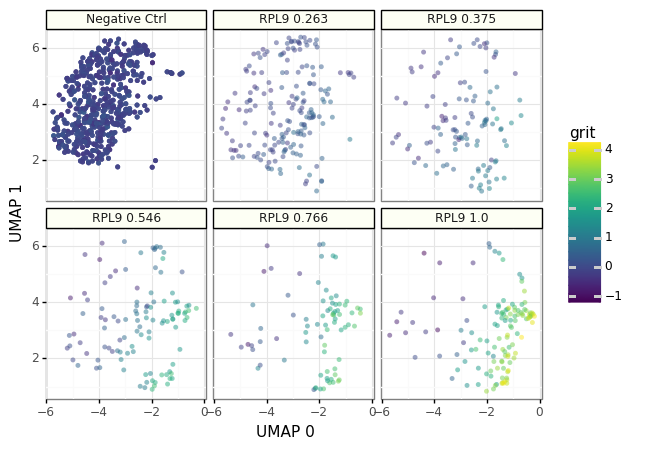

<ggplot: (397177775)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_HSPA9_singlecell_umap_grit.png


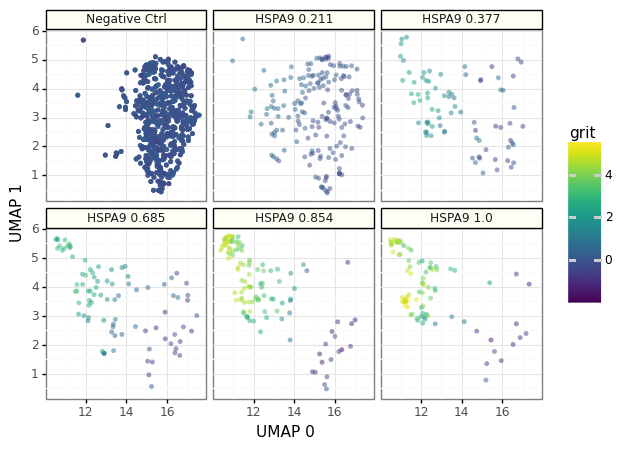

<ggplot: (397797111)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPS18_singlecell_umap_grit.png


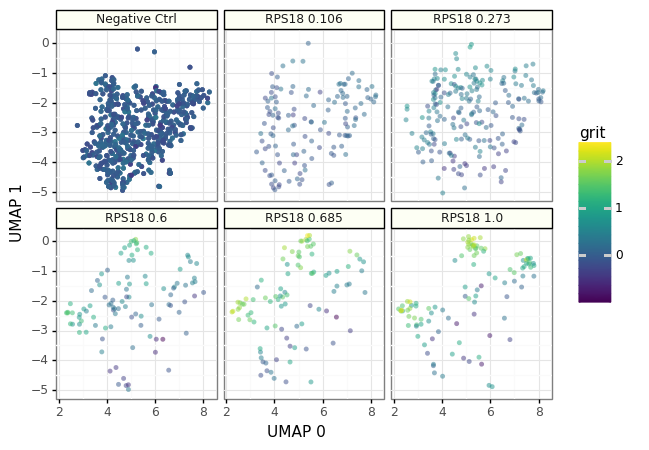

<ggplot: (397117148)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_ALDOA_singlecell_umap_grit.png


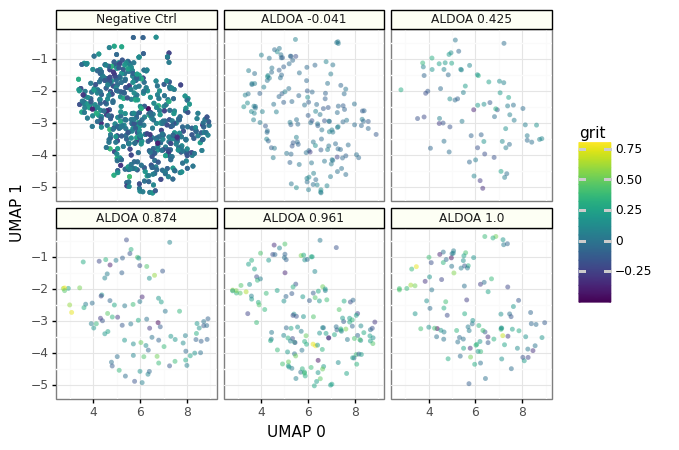

<ggplot: (397233210)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_RPS15_singlecell_umap_grit.png


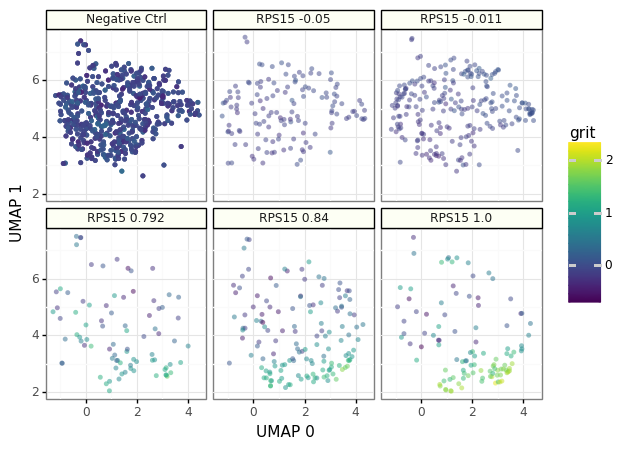

<ggplot: (397115329)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_ATP5E_singlecell_umap_grit.png


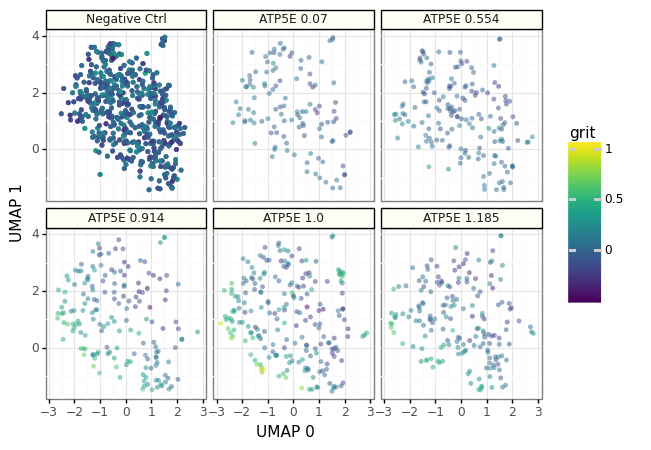

<ggplot: (397226409)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_COX11_singlecell_umap_grit.png


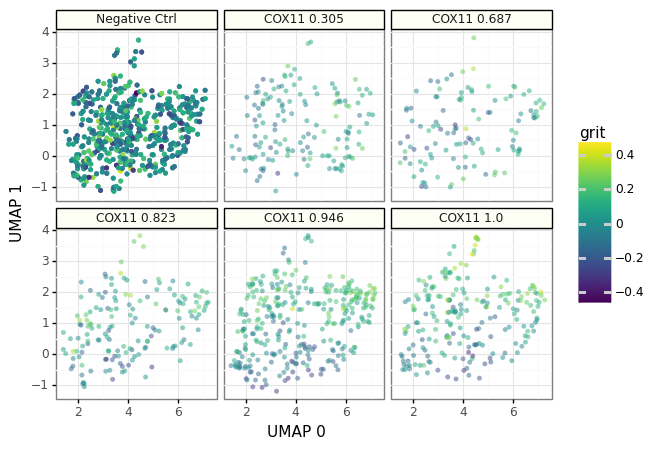

<ggplot: (397320461)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_BCR_singlecell_umap_grit.png


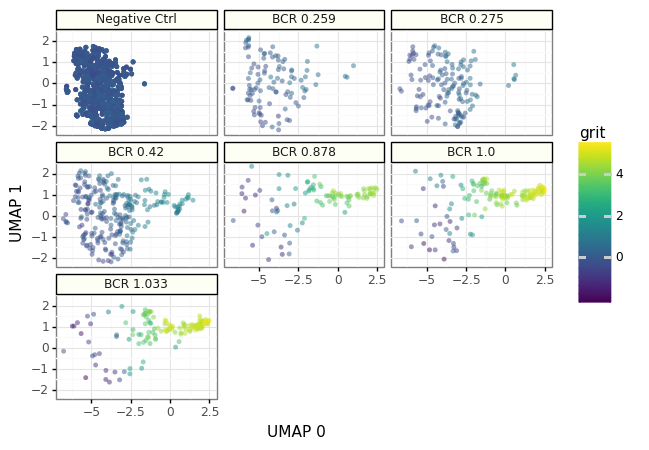

<ggplot: (401341088)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_GNB2L1_singlecell_umap_grit.png


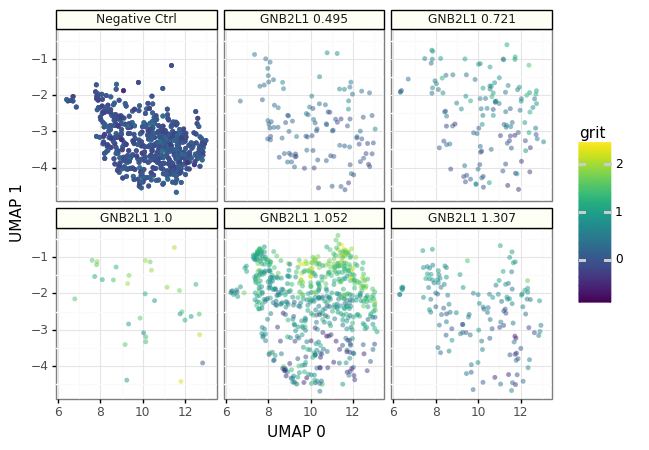

<ggplot: (397349663)>


/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 6 x 5 in image.
/Users/gway/miniconda3/envs/grit-benchmark/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gene_umaps/GSE132080_GNB2L1_singlecell_umap_expression.png


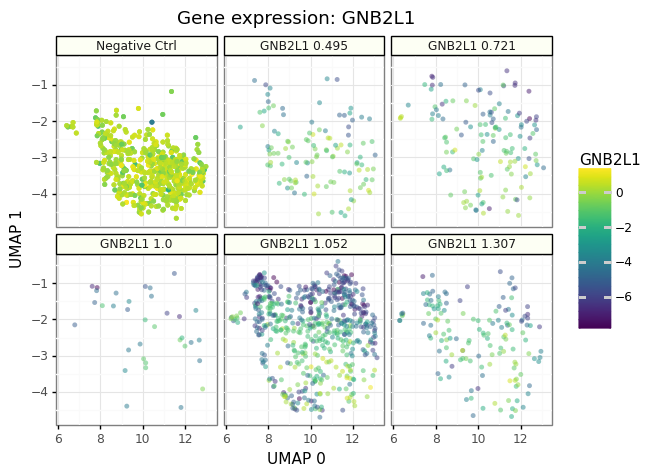

<ggplot: (400182276)>


In [10]:
for gene in sc_df.gene.unique():
    if gene in ["neg", "*", "nan", np.nan]:
        continue
    
    gene_embedding_df = sc_df.query("grit_gene == @gene")

    gene_embedding_df = (
        gene_embedding_df
        .assign(
            grit_facet_label=(
                gene_embedding_df.grit_gene + " " + gene_embedding_df.relative_activity_day5.round(3).astype(str)
            )
        )
    )
    
    # Setup data frame for plotting
    gene_embedding_df.loc[gene_embedding_df.Metadata_gene_identity == "neg", "grit_facet_label"] = "Negative Ctrl"
    facet_order = ["Negative Ctrl"] + [
        f"{gene_embedding_df.grit_gene.unique()[0]} "+ str(x) 
        for x in sorted(gene_embedding_df.relative_activity_day5.dropna().unique().round(3))
    ]
    gene_embedding_df.loc[:, "grit_facet_label"] = pd.Categorical(
        gene_embedding_df.grit_facet_label, categories=facet_order
    ) 

    gene_gg = (
        gg.ggplot(gene_embedding_df.dropna(subset=["grit_facet_label"]), gg.aes(x="umap_0", y="umap_1")) +
        gg.geom_point(gg.aes(color="grit"), size=2, stroke=0, alpha=0.5) +
        gg.facet_wrap("~grit_facet_label") +
        gg.theme_bw() +
        gg.xlab("UMAP 0") +
        gg.ylab("UMAP 1") +
        gg.theme(
            strip_background=gg.element_rect(colour="black", fill="#fdfff4")
        )
    )
    
    output_file = pathlib.Path(f"{output_dir}/gene_umaps/{gse_id}_{gene}_singlecell_umap_grit.png")
    gene_gg.save(output_file, dpi=500, height=5, width=6)
    print(gene_gg)
   
    # Some genes were also directly measured. How does the expression of these look in UMAP space?
    if gene in sc_gene_exp_df.columns:
        meta_merge_cols = [x for x in sc_gene_exp_df.columns if x.startswith("Metadata_")]
        sc_geneexp_embed_df = gene_embedding_df.merge(
            sc_gene_exp_df,
            on=meta_merge_cols,
            how="left"
        )
        
        geneexp_gg = (
            gg.ggplot(sc_geneexp_embed_df.dropna(subset=["grit_facet_label"]), gg.aes(x="umap_0", y="umap_1")) +
            gg.geom_point(gg.aes(color=gene), size=2, stroke=0, alpha=0.5) +
            gg.ggtitle(f"Gene expression: {gene}") +
            gg.facet_wrap("~grit_facet_label") +
            gg.theme_bw() +
            gg.xlab("UMAP 0") +
            gg.ylab("UMAP 1") +
            gg.theme(
                strip_background=gg.element_rect(colour="black", fill="#fdfff4")
            )
        )
        
        output_file = pathlib.Path(f"{output_dir}/gene_umaps/{gse_id}_{gene}_singlecell_umap_expression.png")
        geneexp_gg.save(output_file, dpi=500, height=5, width=6)
        print(geneexp_gg)